In [8]:
print("Iniciando el script de analisis candidatos neutrones...")
print("Importando librerias necesarias...")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from collections import defaultdict
import matplotlib.ticker as ticker
import glob
import os
import pickle
import sys
sys.path.append("/scratch/halmazan//WCTE/WCTECoincidence_Analysis/Complete_analysis")
import functions_spills
import functions_analysis

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

Iniciando el script de analisis candidatos neutrones...
Importando librerias necesarias...


In [9]:
sig_run = '2385'
bkg_run = '2384'

In [10]:
with open(f'/scratch/halmazan/WCTE/files/data/filtered_files/filtered_file_{bkg_run}.pkl', 'rb') as f:
    valores_read, indices_read = pickle.load(f)

with open(f'/scratch/halmazan/WCTE/files/data/filtered_files/filtered_file_{sig_run}.pkl', 'rb') as f:
    valores_read_sig, indices_read_sig = pickle.load(f)

times_branch_filtered = functions_analysis.a_lista_de_arrays(valores_read, indices_read)
times_branch_filtered_sig = functions_analysis.a_lista_de_arrays(valores_read_sig, indices_read_sig)

print("Datos filtrados descargados")
N_events = len(times_branch_filtered)
N_events_sig = len(times_branch_filtered_sig)

print("Numero de eventos bkg", N_events)
print("Numero de eventos señal", N_events_sig)


Datos filtrados descargados
Numero de eventos bkg 157713
Numero de eventos señal 75998


In [11]:
bkg_file = f'/scratch/halmazan/WCTE/files/data/AmBeCandidates/neutron_candidates_{bkg_run}.csv'
sig_file = f'/scratch/halmazan/WCTE/files/data/AmBeCandidates/neutron_candidates_{sig_run}.csv'
df = pd.read_csv(sig_file)
df_bkg = pd.read_csv(bkg_file)

In [12]:
df

event_number    prompt_time  prompt_nhits   delayed_time  delayed_nhits
0              139  153749.636939         158.0  155253.757531           29.0
1              139  153749.636939         158.0  224168.985856           15.0
2              314  211441.439623         168.0  267639.611419           29.0
3              406  150143.763365         253.0  161633.128272           26.0
4              486  159744.395653         166.0  161746.323055           29.0
...            ...            ...           ...            ...            ...
1894         75780   74052.163036         155.0  222985.231539           13.0
1895         75780   74052.163036         155.0  223175.953296           11.0
1896         75780   74052.163036         155.0  225478.701045           29.0
1897         75911  226717.619033         210.0  240095.650680           29.0
1898         75932   69847.381183         227.0  164346.749222           27.0

[1899 rows x 5 columns]

In [13]:
df_bkg

event_number    prompt_time  prompt_nhits   delayed_time  delayed_nhits
0            1658   61253.325096         164.0  186958.710439            520
1            1658   61253.325096         164.0  196369.686217            521
2            4219  237789.889757         188.0  239290.218358              0
3            4219  237789.889757         188.0  240685.099044              1
4            5370   98553.283468         162.0  100053.453342              0
..            ...            ...           ...            ...            ...
482        150722  138851.749345         166.0  226373.990540            475
483        150979  263555.973288         218.0  265059.661070             17
484        151028   41263.203986         165.0   42763.630749              0
485        153324   39520.885405         155.0   41021.112620              0
486        155893    6322.020840         185.0  151977.697101            357

[487 rows x 5 columns]

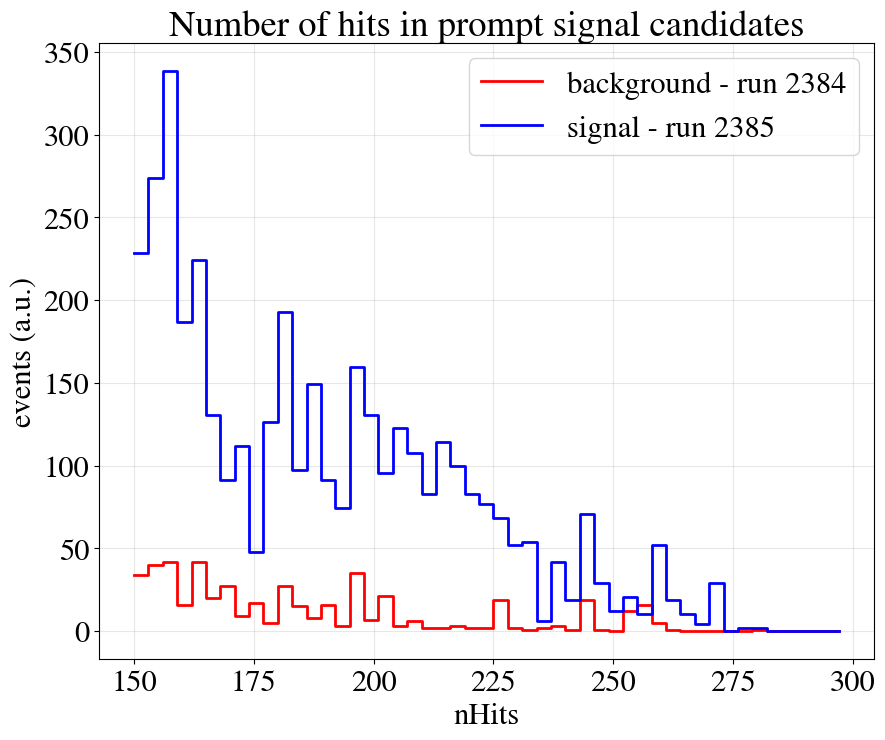

In [59]:
prompt_nhits = df.prompt_nhits.values
prompt_nhits_bkg = df_bkg.prompt_nhits.values

hist, bins_edges = np.histogram(prompt_nhits_bkg, bins=50, range=(150, 300))
hist_sig, _ = np.histogram(prompt_nhits, bins = bins_edges)

plt.figure()
plt.step(bins_edges[:-1], hist, where='post', label=f'background - run {bkg_run}', color='red', lw=2)
plt.step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', label=f'signal - run {sig_run}', color='blue', lw=2)
plt.xlabel('nHits')
plt.ylabel('events (a.u.)')
plt.title('Prompt signal candidates')
plt.legend()
plt.grid(alpha=0.3)

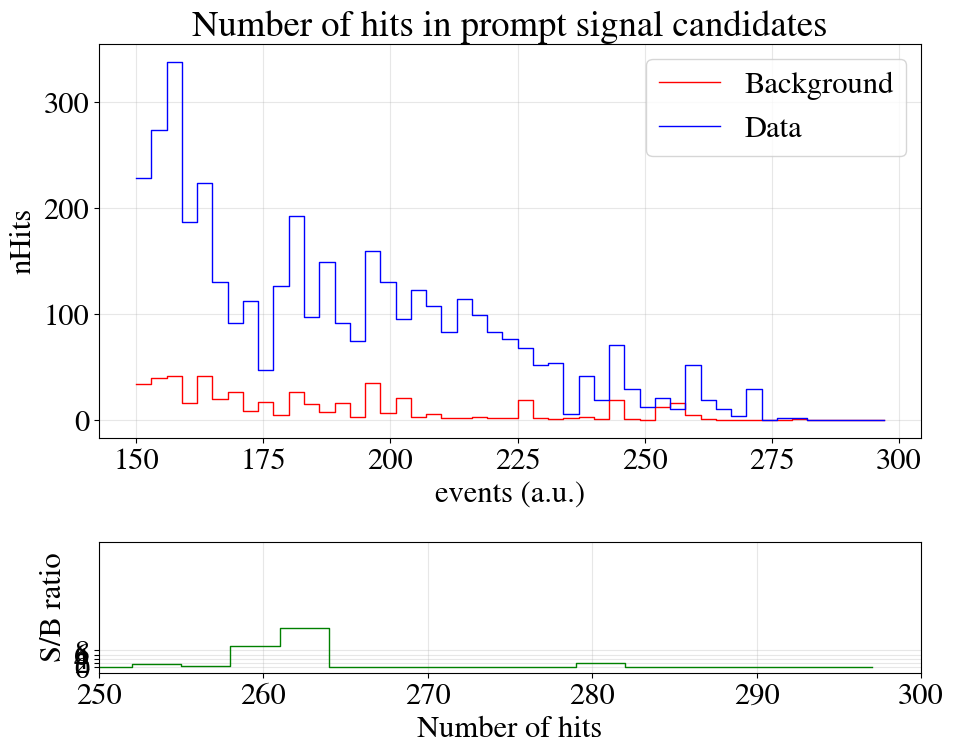

In [52]:
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

hist, bins_edges = np.histogram(prompt_nhits_bkg, bins=50, range=(150, 300))
hist_sig, _ = np.histogram(prompt_nhits, bins = bins_edges)

# Top plot: Background and Signal
#axs[0].hist(prompt_nhits, bins=np.arange(150, 300, 5), histtype='step', label=f'signal - run {sig_run}', color='blue', lw=2)
#axs[0].hist(prompt_nhits_bkg, bins=np.arange(150, 300, 5), histtype='step', label=f'background - run {bkg_run}', color='red', lw=2)
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('nHits')
axs[0].set_xlabel('events (a.u.)')
axs[0].set_title('Number of hits in prompt signal candidates')
axs[0].legend()
axs[0].grid(alpha=0.3)

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig * N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)

axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("Number of hits")
axs[1].set_ylabel("S/B ratio")
#axs[1].set_ylim(0, 8)
axs[1].set_xlim(250, 300)
axs[1].grid(alpha=0.3) 
axs[1].set_yticks(np.arange(0, 9, 2)) 
plt.tight_layout()
plt.show()

In [3]:
window_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

all_n_hits_dict = {}
all_n_hits_dict_sig = {}

for ws in window_sizes:
    filename = f'Plots/nHitsDistribution/csv/all_n_hits_window{ws}.csv'
    all_n_hits_dict[ws] = np.loadtxt(filename, delimiter=',', dtype=int)

    filename_sig = f'Plots/nHitsDistribution/csv/all_n_hits_window{ws}_sig.csv'
    all_n_hits_dict_sig[ws] = np.loadtxt(filename_sig, delimiter=',', dtype=int)


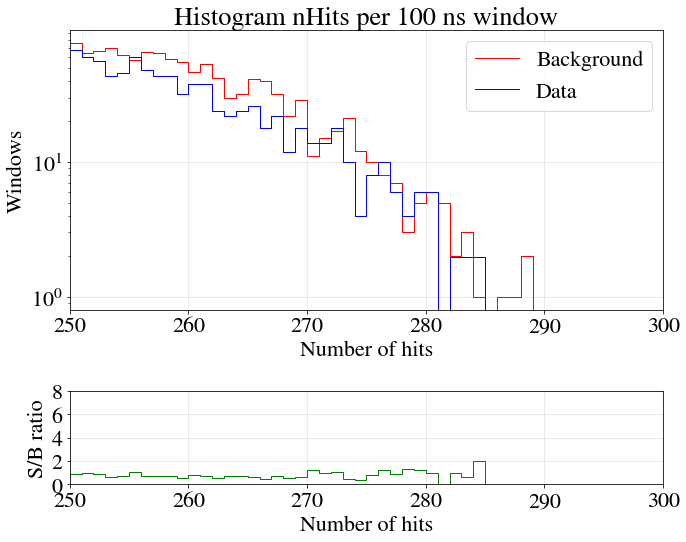

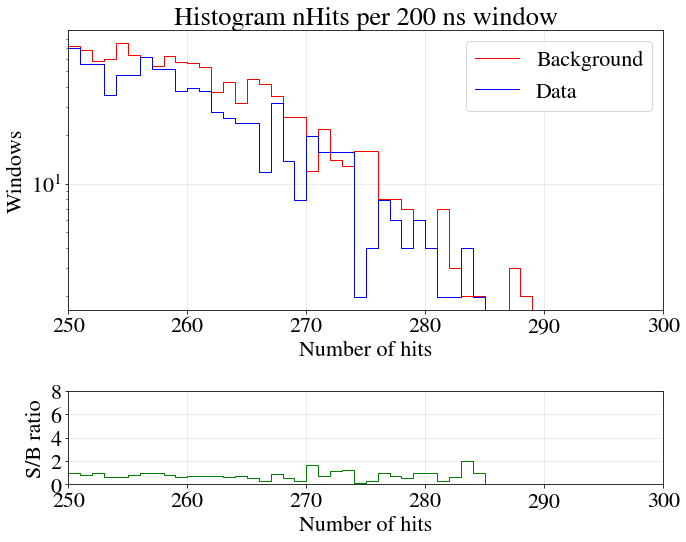

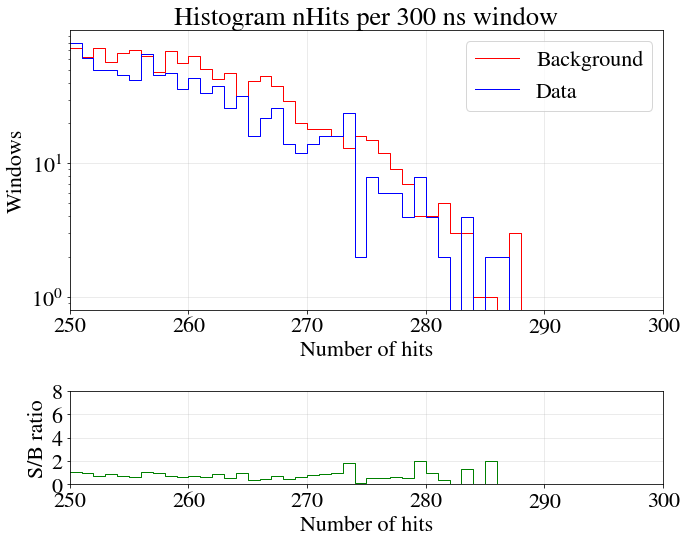

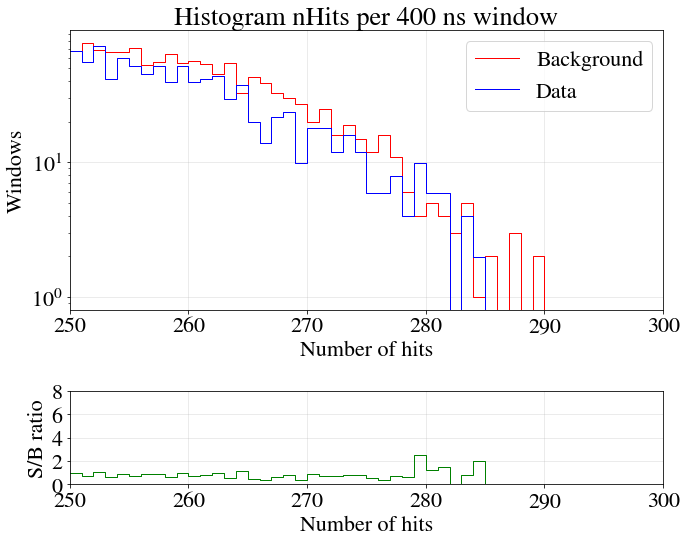

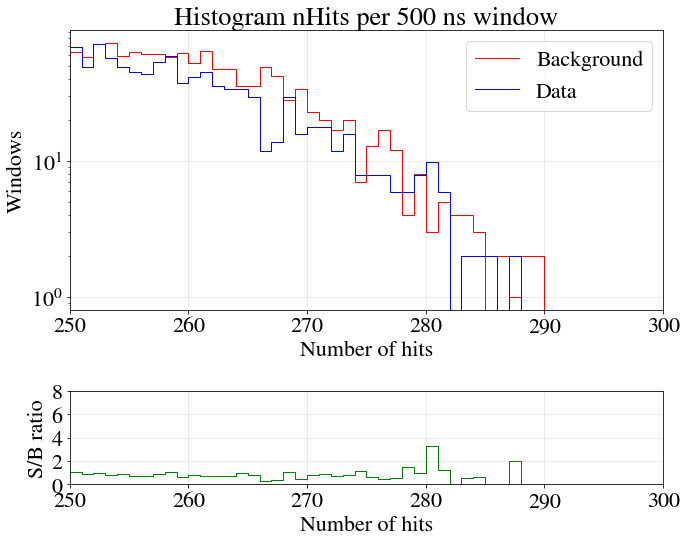

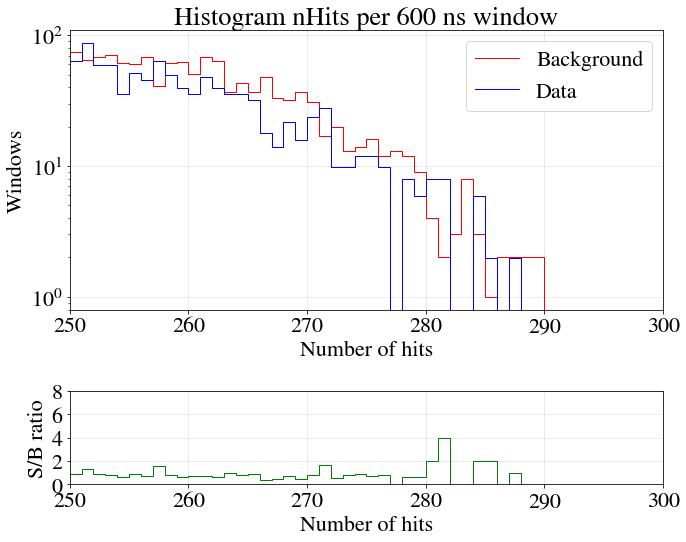

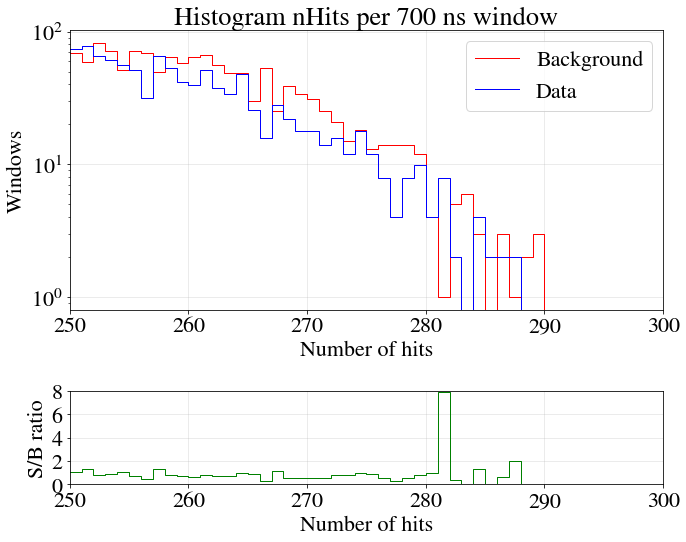

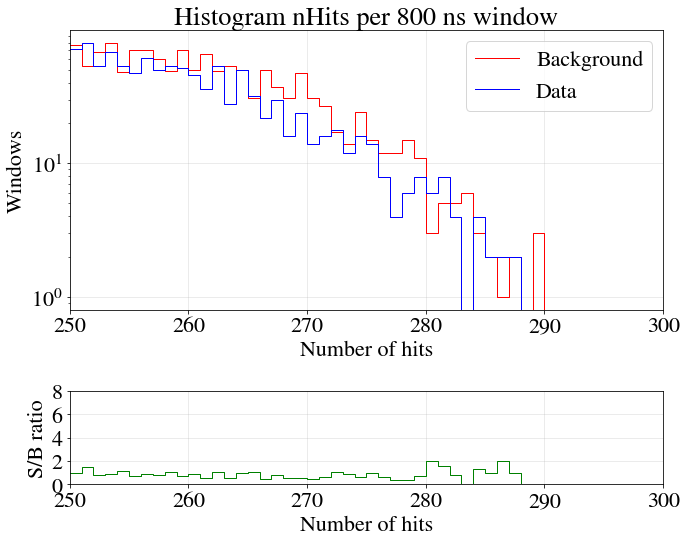

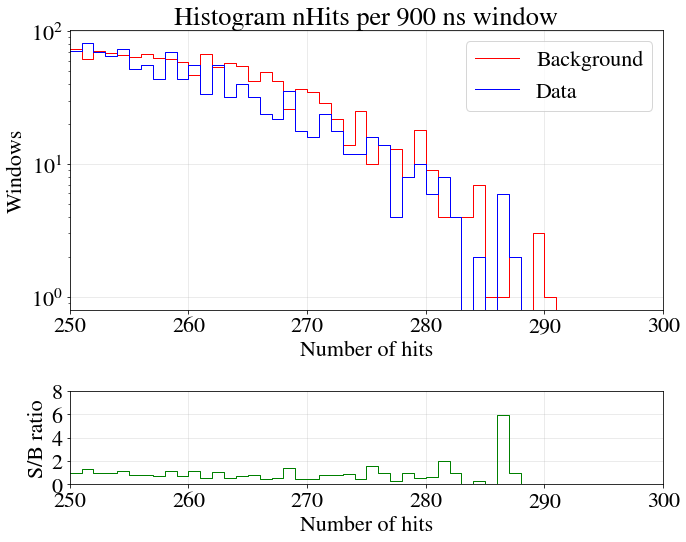

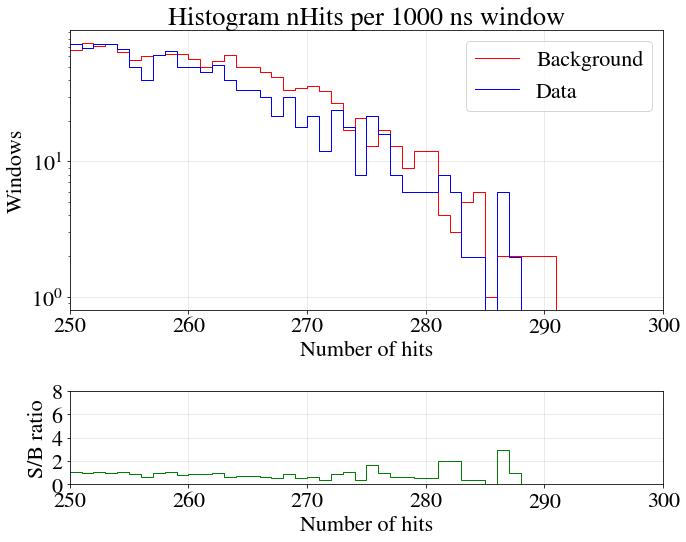

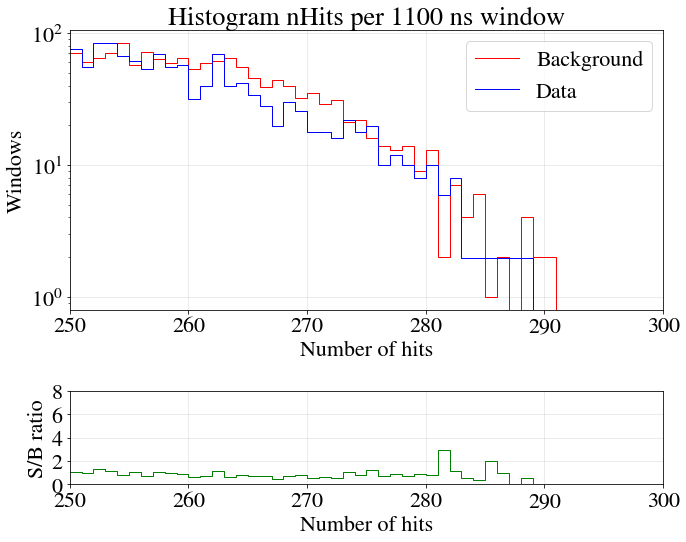

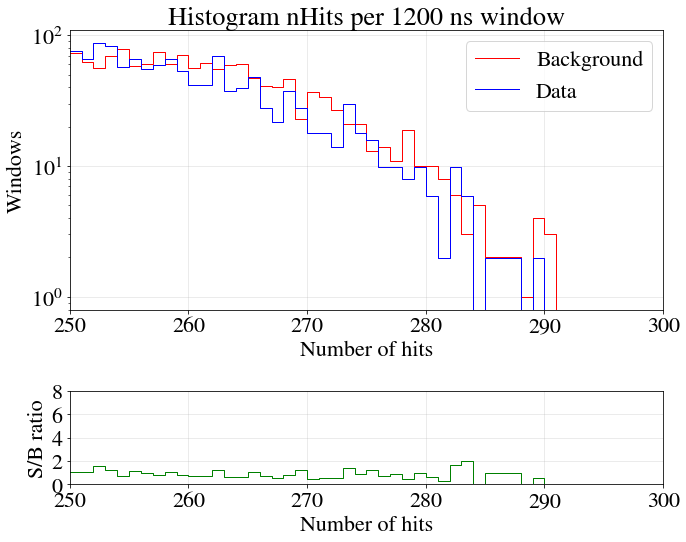

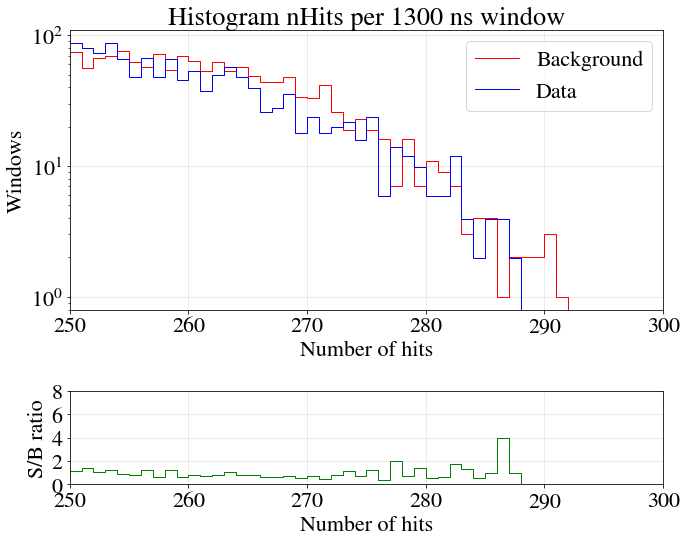

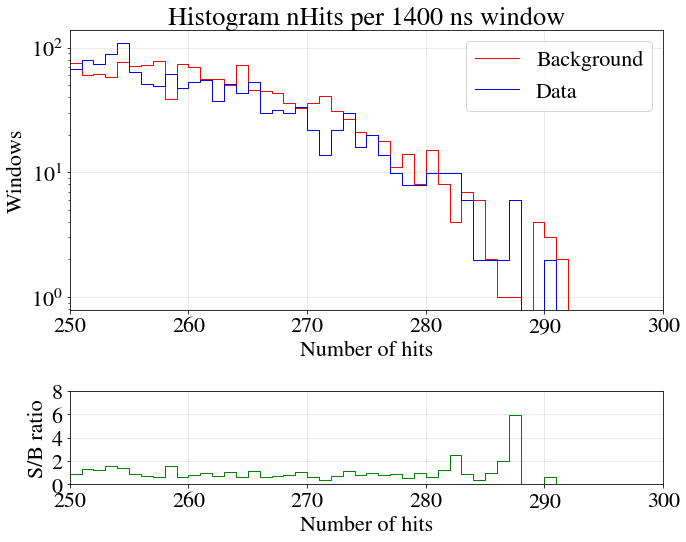

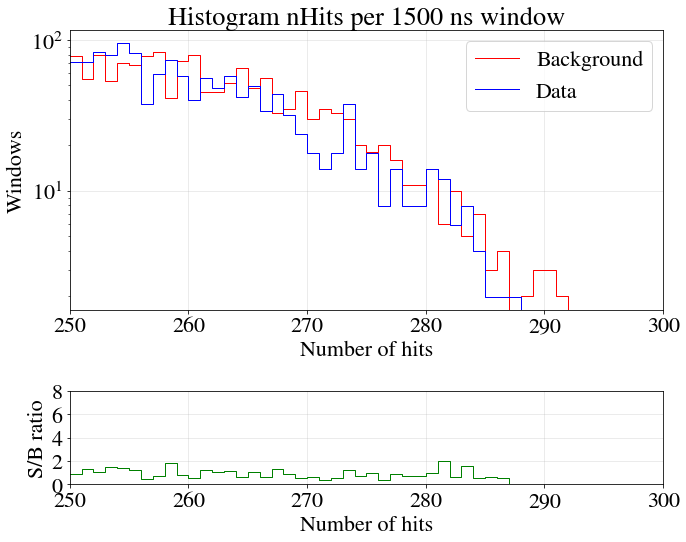

In [13]:
for ws in window_sizes:
    all_n_hits = all_n_hits_dict[ws]
    all_n_hits_sig = all_n_hits_dict_sig[ws]

    hist, bins_edges = np.histogram(all_n_hits, bins=50, range=(250, 300))
    hist_sig, _ = np.histogram(all_n_hits_sig, bins = bins_edges)

    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

    # Top plot: Background and Signal
    axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
    axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
    axs[0].set_ylabel('Windows')
    axs[0].set_xlabel('Number of hits')
    axs[0].set_title(f'Histogram nHits per {ws} ns window')
    axs[0].legend()
    axs[0].set_xlim(250, 300)
    axs[0].grid(alpha=0.3) 
    axs[0].set_yscale('log')

    # Bottom plot: Signal/Background Ratio
    ratio = np.divide(
        hist_sig * N_events / N_events_sig,
        hist,
        out=np.full_like(hist, 0, dtype=float),
        where=hist > 0)
    
    axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
    axs[1].set_xlabel("Number of hits")
    axs[1].set_ylabel("S/B ratio")
    axs[1].set_ylim(0, 8)
    axs[1].set_xlim(250, 300)
    axs[1].grid(alpha=0.3) 
    axs[1].set_yticks(np.arange(0, 9, 2)) 
    plt.tight_layout()
    plt.show()


In [ ]:
plt.figure()
color_list = ["red", "green", "orange", "black", "pink"]
for i, ws in enumerate(window_sizes):

    all_n_hits = all_n_hits_dict[ws]
    hist, bins_edges = np.histogram(all_n_hits, bins=100, range=(0, 100))

    # Top plot: Background and Signal
    plt.step(bins_edges[:-1], hist, where='post', linewidth=2, color=color_list[i], label=f'{ws}')
    
plt.ylabel('Windows')
plt.xlabel('Number of hits')
plt.title(f'Histogram nHits Background')
plt.legend()
plt.show()

In [ ]:
plt.figure()
color_list = ["red", "green", "orange", "black", "pink"]
for i, ws in enumerate(window_sizes):

    all_n_hits = all_n_hits_dict_sig[ws]
    hist, bins_edges = np.histogram(all_n_hits, bins=50, range=(0, 100))

    # Top plot: Background and Signal
    plt.step(bins_edges[:-1], hist * N_events / N_events_sig, where='post', linewidth=2, color=color_list[i], label=f'{ws}')
    
plt.ylabel('Windows')
plt.xlabel('Number of hits')
plt.title(f'Histogram nHits Data')
plt.legend()
plt.show()

In [ ]:
filename = f'Plots/nHitsDistribution/csv/all_n_hits_window500_100-300.csv'
all_n_hits_100 = np.loadtxt(filename, delimiter=',', dtype=int)

filename_sig = f'Plots/nHitsDistribution/csv/all_n_hits_window500_sig_100-300.csv'
all_n_hits_100_sig = np.loadtxt(filename_sig, delimiter=',', dtype=int)

hist, bins_edges = np.histogram(all_n_hits_100, bins=105, range=(90, 300))
hist_sig, _ = np.histogram(all_n_hits_100_sig, bins = bins_edges)


fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('Number of hits')
axs[0].set_title(f'Histogram nHits per 500 ns window')
axs[0].legend()
axs[0].grid(alpha = 0.3)
# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig * N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)
axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("Number of hits")
axs[1].set_ylabel("S/B ratio")
axs[1].set_ylim(0, 2)
axs[1].set_yticks(np.arange(0, 3, 1)) 
axs[1].grid(alpha = 0.3)
plt.tight_layout()
plt.show()

In [ ]:
filename = f'Plots/nHitsDistribution/csv/all_n_hits_window500_100-300.csv'
all_n_hits_500 = np.loadtxt(filename, delimiter=',', dtype=int)

filename_sig = f'Plots/nHitsDistribution/csv/all_n_hits_window500_sig_100-300.csv'
all_n_hits_500_sig = np.loadtxt(filename_sig, delimiter=',', dtype=int)


In [ ]:
hist, bins_edges = np.histogram(all_n_hits_500, bins=50, range=(0, 500))
hist_sig, _ = np.histogram(all_n_hits_500_sig, bins = bins_edges)

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('Number of hits')
axs[0].set_title(f'Histogram nHits per {ws} ns window')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig * N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)
axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("Number of hits")
axs[1].set_ylabel("S/B ratio")
axs[1].set_ylim(0, 2)
axs[1].set_yticks(np.arange(0, 3, 1)) 
plt.tight_layout()
plt.show()